# 실습과제3

보스턴 주택 데이터셋을 활용하여 Linear Regression을 학습시키시오.
1. 데이터를 시각화 하시오.
2. 회귀 계수, MSE, RMSE를 산출하시오
3. 어떤 변수가 가격에 어떠한 영향을 미치고 있는지 간략히 서술 하시오.

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
df = pd.read_csv('boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# 데이터 시각화

In [13]:
df["y"] = df["target"]

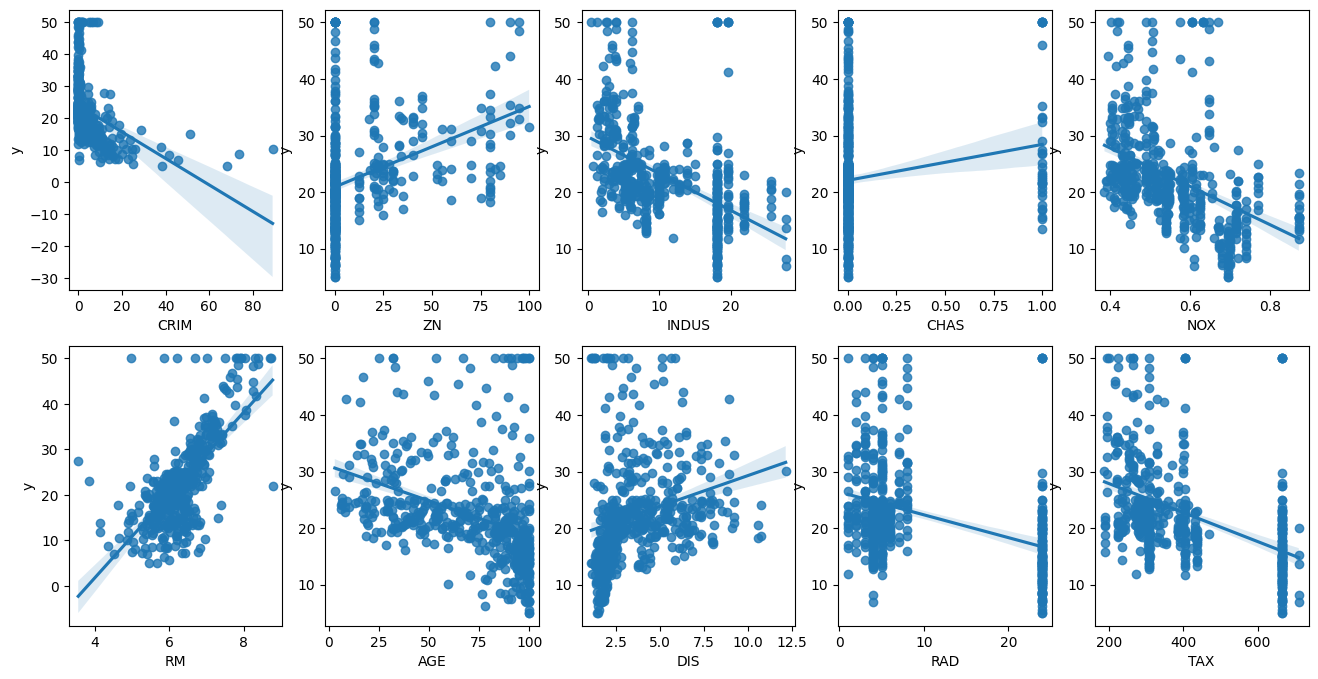

In [15]:
# 여러개의 서브플롯 생성
# 전체 그래프 크기 가로 16인치, 세로 5인치로 지정
# 이전에 생성한 서브플롯을 2행5열로 배치
fig, axs = plt.subplots(figsize = (16, 8), ncols = 5, nrows = 2)

# axs는 2차원 배열 형태(2행 5열)
for i, feature in enumerate(df.columns[:-1]):
    # i를 5로 나눈 몫이 행 인덱스, i를 5로 나눈 나머지가 열 인덱스
    if i >= 10:  # axs의 인덱스 범위를 초과하지 않도록 조건 추가
        break
    row = i // 5
    col = i % 5
    # seaborn의 regplot을 이용해 산점도와 회귀선 그리기
    sns.regplot(data=df, x=feature, y="y", ax=axs[row][col])



# 모델 학습

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 테스트 데이터셋으로 예측 수행
y_pred = lr.predict(X_test)

In [18]:
# 학습한 모델의 회귀계수 확인
reg_coef = lr.coef_
print("Regression Coefficients:", reg_coef)

Regression Coefficients: [ 2.57617926e-16  6.24500451e-17  4.81060504e-16  1.66097371e-14
 -5.73331564e-14 -3.06725538e-15  1.99493200e-17 -6.04767972e-16
  1.11239143e-16 -5.89805982e-17  4.63903005e-16 -1.94289029e-16
  1.95915333e-16  1.00000000e+00]


In [21]:
# mse 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.3902457491439483e-28


In [22]:
# rmse 계산
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 1.841261999049551e-14


### 변수들에 대한 설명

##### 회귀계수

회귀분석에서 독립변수가 종속변수에 어떤 영향을 미치는지를 나타내는 값
회귀계수는 독립변수의 변화가 종속변수에 어떤 영향을 미치는지를 수치로 나타내며, 이를 통해 독립변수와 종속변수 사이의 관계를 이해할 수 있습니다.

##### MSE

MSE(Mean Squared Error)는 평균 제곱 오차라고도 하며, 회귀분석에서 예측값과 실제값의 차이를 나타내는 지표 중 하나입니다. MSE는 예측값과 실제값의 차이를 제곱한 후, 그 평균을 구하는 방식으로 계산됩니다.

##### RMSE

평균 제곱근 오차라고도 하며, MSE(Mean Squared Error)의 제곱근을 취한 값입니다. RMSE는 예측값과 실제값의 차이를 나타내는 지표 중 하나로, 값이 작을수록 모델의 예측 성능이 좋다는 것을 의미합니다.

RMSE는 MSE와 마찬가지로 예측값과 실제값의 차이를 나타내지만, 제곱근을 취하기 때문에 실제값과 예측값의 차이의 단위가 원래의 단위로 돌아옵니다. 이로 인해 RMSE는 MSE에 비해 해석이 더 쉽다는 장점이 있습니다. RMSE 역시 값이 작을수록 모델의 예측 성능이 좋다고 평가할 수 있습니다.